In [12]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

In [13]:
df_2 = pd.read_csv("Cust_Segmentation.csv").copy()
df_2.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [14]:
df_2.index = df_2.iloc[:,0]
df_2.head()
del df_2.index.name
df_2 = df_2.drop(['Customer Id','Age','Years Employed','Card Debt','Other Debt','Defaulted','Address','Edu'], axis = 1)

In [15]:
df_2.head()

,Income,DebtIncomeRatio
1,19,6.3
2,100,12.8
3,57,20.9
4,19,6.3
5,253,7.2


In [16]:
# İki değişkenin eşit oranda kümelemeye etki etmesi için normalizasyon işlemi gereklidir.

In [17]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,500.0,46.1480,34.652615,13.0,24.0,34.0,57.0,253.0
DebtIncomeRatio,500.0,10.2204,6.797319,0.1,5.0,8.9,13.9,41.3


In [18]:
df_income = df_2["Income"]
df_income.head()

1     19
2    100
3     57
4     19
5    253
Name: Income, dtype: int64

In [19]:
df_2["Income"] = (df_2["Income"] - 13) / (253 - 13)

In [20]:
# Borç Gelir Oranı değişkeni (DebtIncomeRatio) normalizasyonu. 

In [21]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,500.0,0.138117,0.144386,0.0,0.045833,0.0875,0.183333,1.0
DebtIncomeRatio,500.0,10.220400,6.797319,0.1,5.000000,8.9000,13.900000,41.3


In [22]:
df_2["DebtIncomeRatio"] = (df_2["DebtIncomeRatio"] - 0.1) / (41.3 - 0.1)

In [23]:
# şimdi kümeleme için en iyi k değerini elbow yardımı ile bulalım.

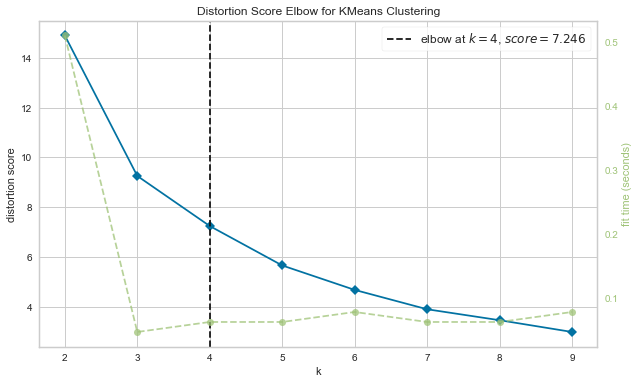

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
plt.figure(figsize=(10, 6))
visualizer = KElbowVisualizer(kmeans, k=(2,10)) # 2'den 10'a kadar olan küme sayılarını dene ve bir görselleştir.
visualizer.fit(df_2)
visualizer.poof()

In [25]:
# Elbow'a göre en optimum kümeleme sayısı 4.
kmeans = KMeans(n_clusters = 4)
k_fit = kmeans.fit(df_2)
clusters = k_fit.labels_

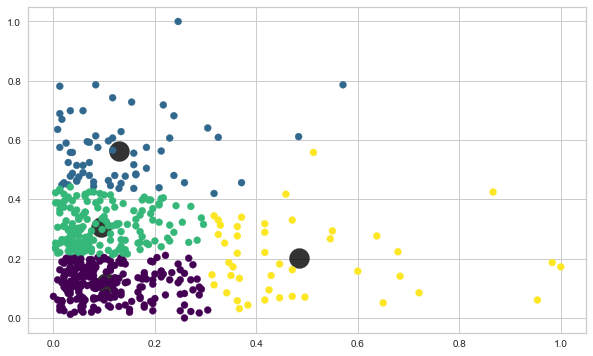

In [26]:
centers = k_fit.cluster_centers_
plt.figure(figsize=(10, 6))
plt.scatter(centers[:,0], centers[:,1], c = "black", s = 400, alpha = 0.8);
plt.scatter(df_2.iloc[:,0],df_2.iloc[:,1],c=clusters,cmap="viridis")

In [27]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,500.0,0.138117,0.144386,0.0,0.045833,0.087500,0.183333,1.0
DebtIncomeRatio,500.0,0.245641,0.164983,0.0,0.118932,0.213592,0.334951,1.0


In [28]:
# 3-Ortalamalar Kümeleme

In [29]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df_2)
clusters = k_fit.labels_

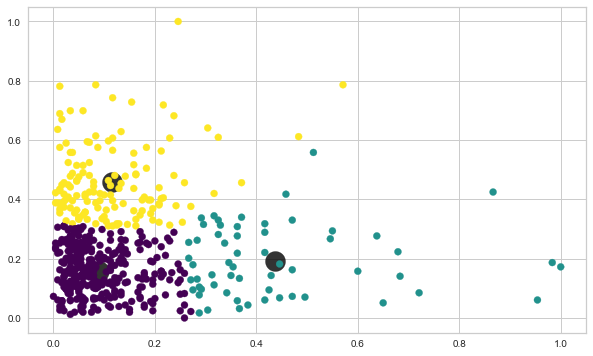

In [30]:
centers = k_fit.cluster_centers_
plt.figure(figsize=(10, 6))
plt.scatter(centers[:,0], centers[:,1], c = "black", s = 400, alpha = 0.8);
plt.scatter(df_2.iloc[:,0],df_2.iloc[:,1],c=clusters,cmap="viridis")

In [31]:
# 5-Ortalamalar Kümeleme

In [32]:
kmeans = KMeans(n_clusters = 5)
k_fit = kmeans.fit(df_2)
clusters = k_fit.labels_

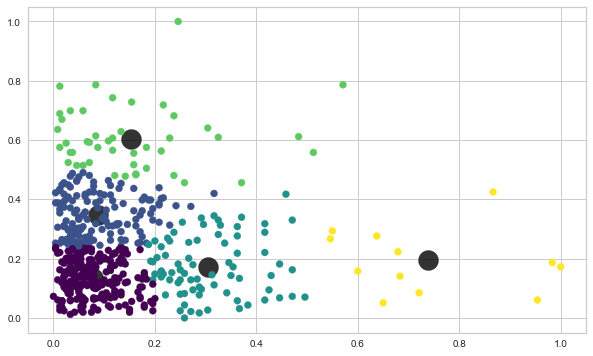

In [33]:
centers = k_fit.cluster_centers_
plt.figure(figsize=(10, 6))
plt.scatter(centers[:,0], centers[:,1], c = "black", s = 400, alpha = 0.8);
plt.scatter(df_2.iloc[:,0],df_2.iloc[:,1],c=clusters,cmap="viridis")